In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import kernel_ridge
from scipy.stats import logistic

## Import Data Set

In [3]:
# Get naive and actual occupancy percentage data
X_data = pd.read_csv('X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,3]
print('Naive occupancy')
print(X_data[0:10])

Y_data = pd.read_csv('Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
print('Actual occupancy')
print(Y_data[0:10])

Naive occupancy
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [4]:
# Group data to day snapshot
X_data = np.reshape(X_data, (84,720))
print('Naive occupancy')
print(X_data.shape)
print(X_data[0][:10])


Y_data = np.reshape(Y_data, (84,720))
print('Actual occupancy')
print(Y_data.shape)
print(Y_data[0][:10])

Naive occupancy
(84, 720)
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
(84, 720)
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [5]:
# Get block names label for each of X/Y data
block_names = pd.read_csv('block_names.csv')
block_names = np.array(block_names.iloc[:,1])
block_names = np.reshape(block_names, (12,7))
print(block_names[0])

['11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/21'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/22'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/23'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/24'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/25'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/26'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/28']


In [6]:
# Group data into blocks
blocks_X = np.reshape(X_data, (12,7,720))
blocks_Y = np.reshape(Y_data, (12,7,720))
print(blocks_X[0,0,:10])
print(blocks_Y[0,0,:10])

[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


## Correlated Blocks

In [7]:
def display(X, Y, name):
    time = np.arange(720)
    random_list = random.sample(range(0, len(Y)), 4)
    plt.figure(figsize=(16,10))
    for i in range(4):
        index = random_list[i]
        plt.subplot(2, 2, i+1)
        plt.plot(time, X[index], color='g', label='Naive')
        plt.plot(time, Y[index], color='b', label='Actual')
        plt.legend()
        plt.xlabel('Time (min since 8:00 am)')
        plt.xticks(np.arange(0,780,60))
        plt.ylabel('Occupancy Percentage')
        plt.title(name[index])

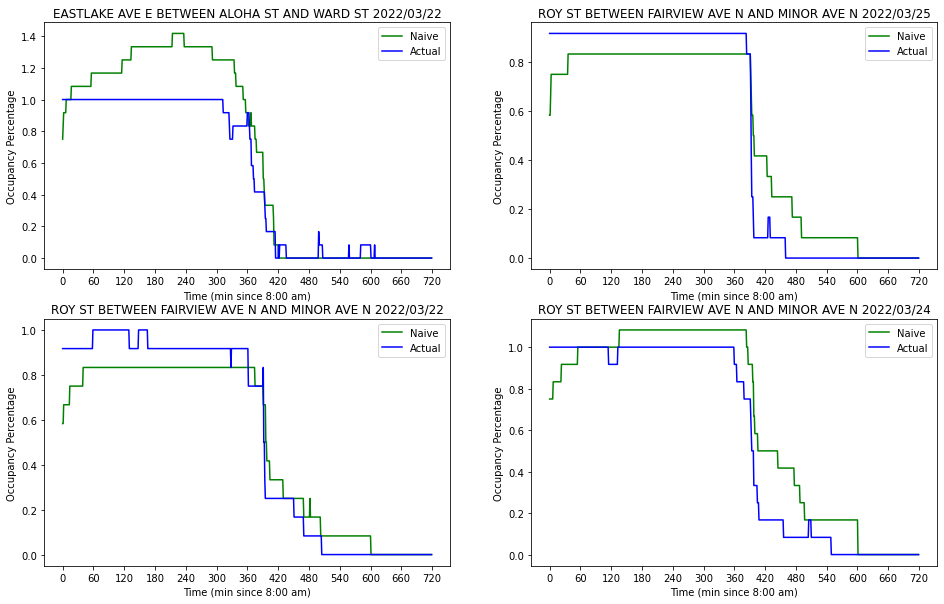

In [99]:
corr1_x = np.vstack((blocks_X[4], blocks_X[7], blocks_X[11]))
corr1_y = np.vstack((blocks_Y[4], blocks_Y[7], blocks_Y[11]))
corr1_name = np.concatenate((block_names[4], block_names[7], block_names[11]))
display(corr1_x, corr1_y, corr1_name)

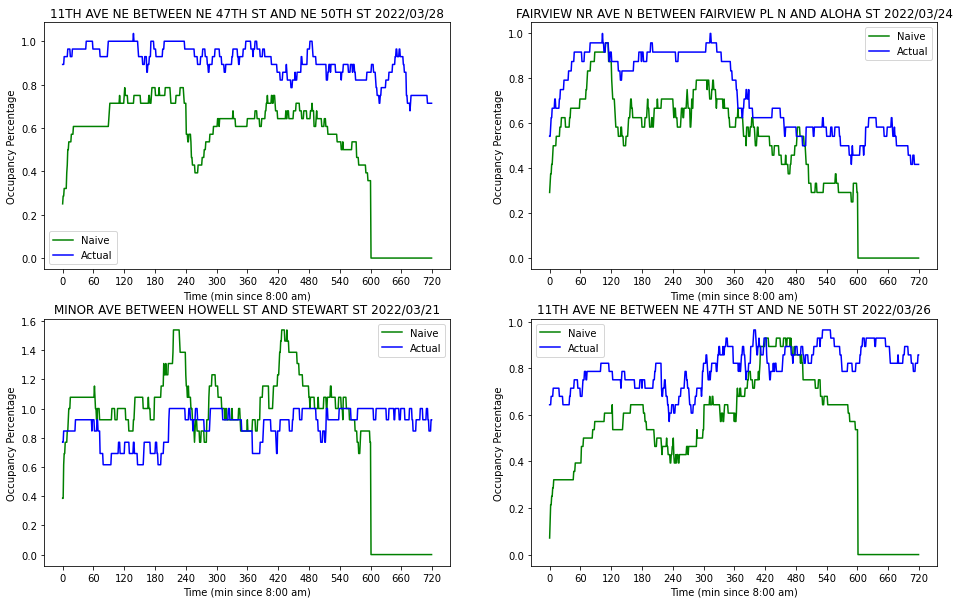

In [9]:
corr2_x = np.vstack((blocks_X[0], blocks_X[9], blocks_X[10]))
corr2_y = np.vstack((blocks_Y[0], blocks_Y[9], blocks_Y[10]))
corr2_name = np.concatenate((block_names[0], block_names[9], block_names[10]))
display(corr2_x, corr2_y, corr2_name)

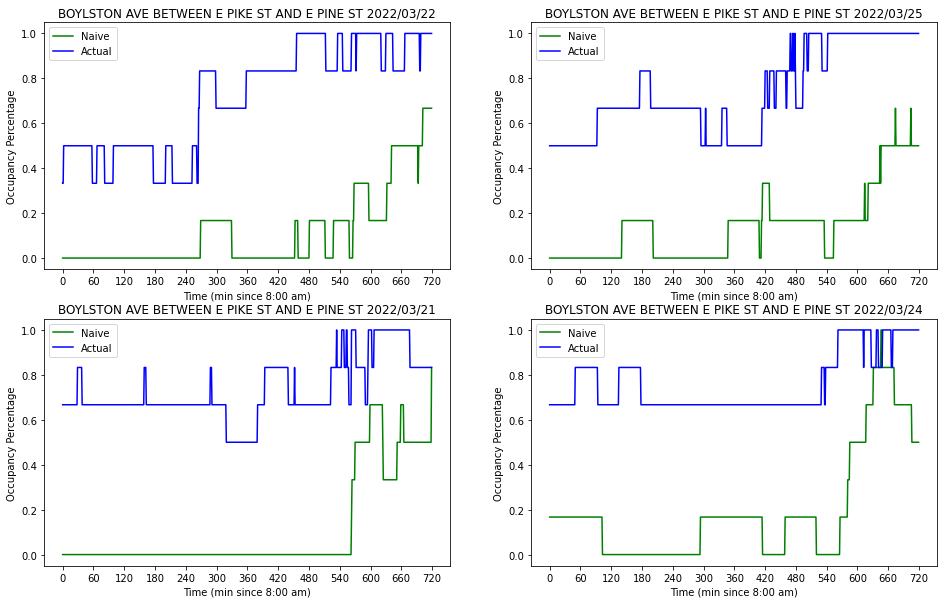

In [10]:
corr3_x = blocks_X[6]
corr3_y = blocks_Y[6]
corr3_name = block_names[6]
display(corr3_x, corr3_y, corr3_name)

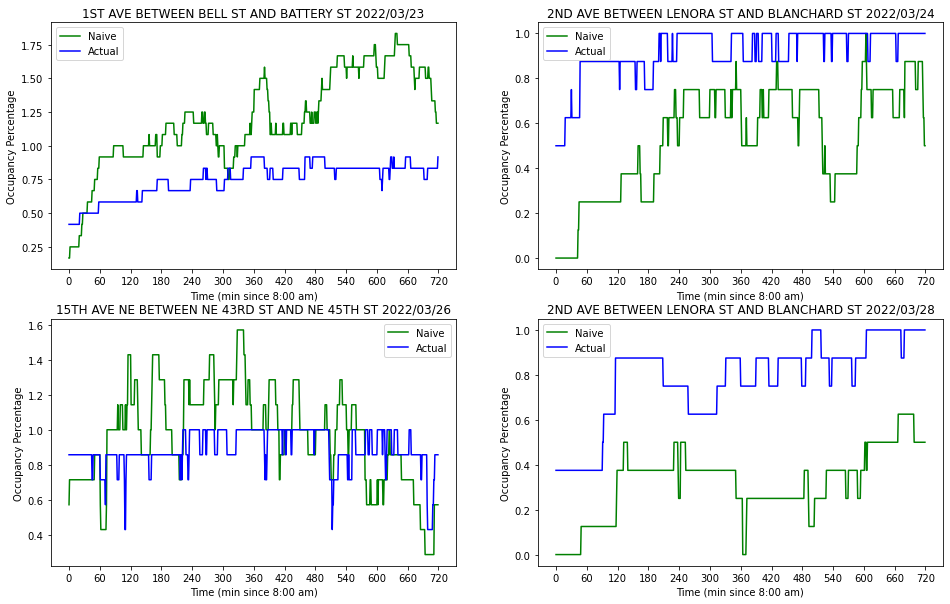

In [11]:
corr4_x = np.vstack((blocks_X[1], blocks_X[2], blocks_X[3]))
corr4_y = np.vstack((blocks_Y[1], blocks_Y[2], blocks_Y[3]))
corr4_name = np.concatenate((block_names[1], block_names[2], block_names[3]))
display(corr4_x, corr4_y, corr4_name)

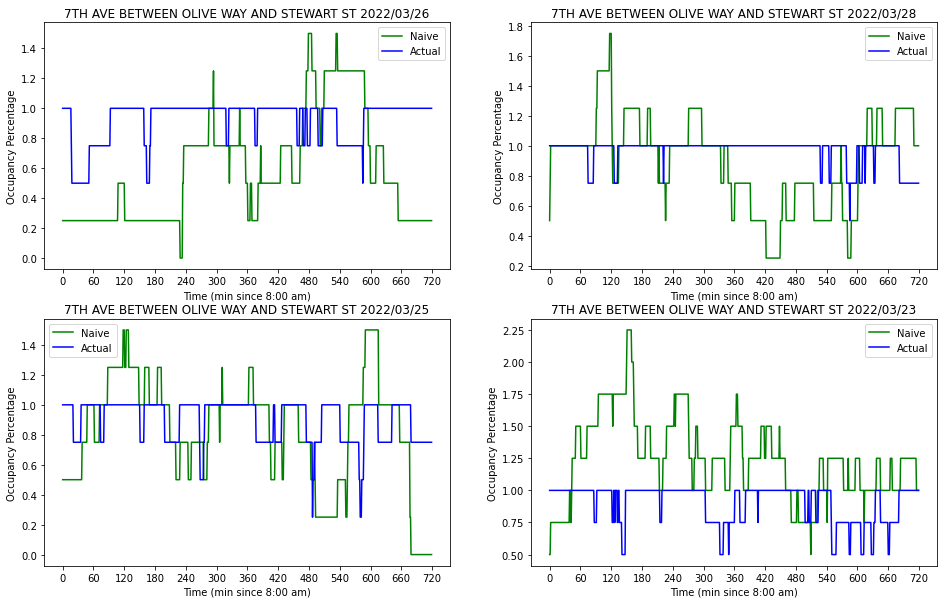

In [12]:
corr5_x = blocks_X[5]
corr5_y = blocks_Y[5]
corr5_name = block_names[5]
display(corr5_x, corr5_y, corr5_name)

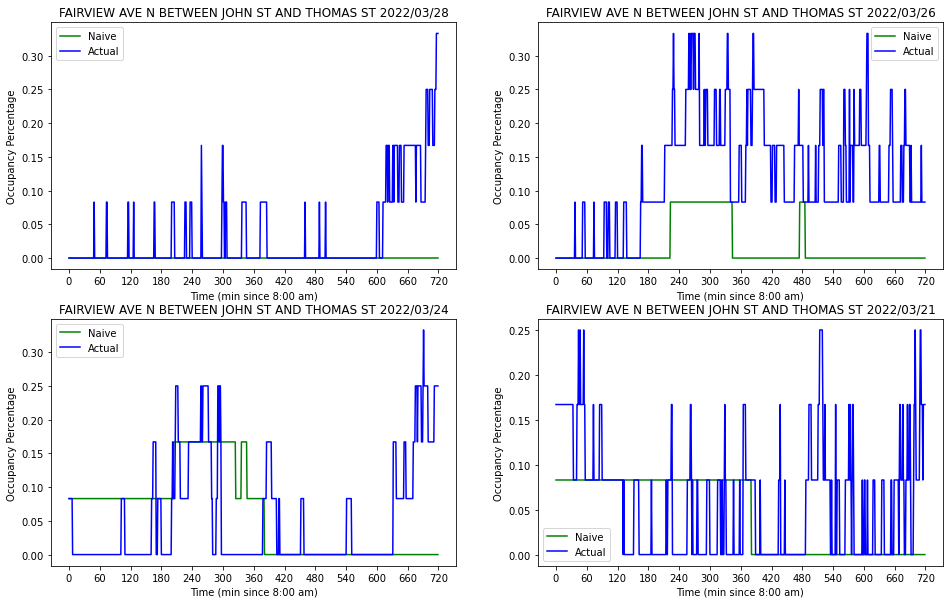

In [13]:
corr6_x = blocks_X[8]
corr6_y = blocks_Y[8]
corr6_name = block_names[8]
display(corr6_x, corr6_y, corr6_name)

## Ridge Regression with Gaussian Kernel

In [14]:
rand = random.randrange(100)
print(rand)

44


In [15]:
reg_error = []

### Correlated Block 1

In [16]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(corr1_x, corr1_y, test_size=0.10, random_state=rand)

In [17]:
lambda_val = 0.1
gamma = 0.01

rrg1 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg1.fit(x_train1, y_train1)
y_predicted = rrg1.predict(x_test1)

In [18]:
n = len(y_train1)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test1-y_predicted))
    naive_error += np.mean(np.abs(y_test1-x_test1))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.033064603833857384
Naive Error: 
0.06744861111111114


### Correlated Block 2

In [19]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(corr2_x, corr2_y, test_size=0.10, random_state=rand)

In [20]:
lambda_val = 0.01
gamma = 0.001

rrg2 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg2.fit(x_train2, y_train2)
y_predicted = rrg2.predict(x_test2)

In [21]:
n = len(y_train2)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test2-y_predicted))
    naive_error += np.mean(np.abs(y_test2-x_test2))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.1048442677419348
Naive Error: 
0.2447717592592592


### Correlated Block 3

In [22]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(corr3_x, corr3_y, test_size=0.10, random_state=rand)

In [23]:
lambda_val = 0.1
gamma = 0.001

rrg3 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg3.fit(x_train3, y_train3)
y_predicted = rrg3.predict(x_test3)

In [24]:
n = len(y_train3)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test3-y_predicted))
    naive_error += np.mean(np.abs(y_test3-x_test3))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.23105098347203404
Naive Error: 
0.709148611111111


### Correlated Block 4

In [25]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(corr4_x, corr4_y, test_size=0.10, random_state=rand)

In [26]:
lambda_val = 0.1
gamma = 0.0001

rrg4 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg4.fit(x_train4, y_train4)
y_predicted = rrg4.predict(x_test4)

In [27]:
n = len(y_train4)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test4-y_predicted))
    naive_error += np.mean(np.abs(y_test4-x_test4))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.0910672104909418
Naive Error: 
0.41743842592592606


### Correlated Block 5

In [28]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(corr5_x, corr5_y, test_size=0.10, random_state=rand)

In [29]:
lambda_val = 0.01
gamma = 0.001

rrg5 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg5.fit(x_train5, y_train5)
y_predicted = rrg5.predict(x_test5)

In [30]:
n = len(y_train5)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test5-y_predicted))
    naive_error += np.mean(np.abs(y_test5-x_test5))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.1787114724688115
Naive Error: 
0.4684027777777778


### Correlated Block 6

In [31]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(corr6_x, corr6_y, test_size=0.10, random_state=rand)

In [32]:
lambda_val = 0.01
gamma = 0.001

rrg6 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg6.fit(x_train6, y_train6)
y_predicted = rrg6.predict(x_test6)

In [33]:
n = len(y_train6)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test6-y_predicted))
    naive_error += np.mean(np.abs(y_test6-x_test6))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.09611441614467668
Naive Error: 
0.10221805555555553


## Classification

In [34]:
mt = len(x_test1) + len(x_test2) + len(x_test3) + len(x_test4) + len(x_test5) + len(x_test6) 

### Correlated Block 1

In [35]:
n = len(x_train1)
nt = len(x_test1)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [36]:
yb1_train = np.concatenate((one, zero))
xb1_train = np.vstack((x_train1, x_train2, x_train3, x_train4, x_train5, x_train6))

In [37]:
yb1_test = np.concatenate((onet, zerot))
xb1_test = np.vstack((x_test1, x_test2, x_test3, x_test4, x_test5, x_test6))

### Correlated Block 2

In [38]:
n = len(x_train2)
nt = len(x_test2)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [39]:
yb2_train = np.concatenate((one, zero))
xb2_train = np.vstack((x_train2, x_train1, x_train3, x_train4, x_train5, x_train6))

In [40]:
yb2_test = np.concatenate((onet, zerot))
xb2_test = np.vstack((x_test2, x_test1, x_test3, x_test4, x_test5, x_test6))

### Correlated Block 3

In [41]:
n = len(x_train3)
nt = len(x_test3)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [42]:
yb3_train = np.concatenate((one, zero))
print(yb3_train.shape)
xb3_train = np.vstack((x_train3, x_train1, x_train2, x_train4, x_train5, x_train6))

(72,)


In [43]:
yb3_test = np.concatenate((onet, zerot))
xb3_test = np.vstack((x_test3, x_test1, x_test2, x_test4, x_test5, x_test6))

### Correlated Block 4

In [44]:
n = len(x_train4)
nt = len(x_test4)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [45]:
yb4_train = np.concatenate((one, zero))
xb4_train = np.vstack((x_train4, x_train1, x_train2, x_train3, x_train5, x_train6))

In [46]:
yb4_test = np.concatenate((onet, zerot))
xb4_test = np.vstack((x_test4, x_test1, x_test2, x_test3, x_test5, x_test6))

### Correlated Block 5

In [47]:
n = len(x_train5)
nt = len(x_test5)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [48]:
yb5_train = np.concatenate((one, zero))
xb5_train = np.vstack((x_train5, x_train1, x_train2, x_train3, x_train4, x_train6))

In [49]:
yb5_test = np.concatenate((onet, zerot))
xb5_test = np.vstack((x_test5, x_test1, x_test2, x_test3, x_test4, x_test6))

### Correlated Block 6

In [50]:
n = len(x_train6)
nt = len(x_test6)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [51]:
yb6_train = np.concatenate((one, zero))
xb6_train = np.vstack((x_train6, x_train1, x_train2, x_train3, x_train4, x_train5))

In [52]:
yb6_test = np.concatenate((onet, zerot))
xb6_test = np.vstack((x_test6, x_test1, x_test2, x_test3, x_test4, x_test5))
print(yb1_test)

[ 1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [53]:
lambda_val = 0.1
gamma = 0.01

In [54]:
rgc1 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc1.fit(xb1_train, yb1_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [55]:
rgc2 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc2.fit(xb2_train, yb2_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [56]:
rgc3 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc3.fit(xb3_train, yb3_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [57]:
rgc4 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc4.fit(xb4_train, yb4_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [58]:
rgc5 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc5.fit(xb5_train, yb5_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [59]:
rgc6 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc6.fit(xb6_train, yb6_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

## Correlation Prediction

In [138]:
def predict_occ(x_test, rrg, rgc, tol):
    prediction = np.zeros((x_test.shape))
    x = x_test.reshape(1,-1)
    scale = []
    for i in range(6):
        scale.append(logistic.cdf(rgc[i].predict(x))[0])
    print(scale)
    largest = np.argmax(scale)
    scale = np.delete(scale, largest)
    sec_largest = np.argmax(scale)

    prediction += 0.9 * rrg[largest].predict(x)[0]
    prediction += 0.1 * rrg[sec_largest].predict(x)[0]
    
    return prediction

In [131]:
rrg = [rrg1, rrg2, rrg3, rrg4, rrg5, rrg6]
rgc = [rgc1, rgc2, rgc3, rgc4, rgc5, rgc6]

In [132]:
s = len(xb1_test)
yb_test = np.vstack((y_test1, y_test2, y_test3, y_test4, y_test5, y_test6))

In [139]:
prediction = []
for i in range(s):
    prediction.append(predict_occ(xb1_test[i], rrg, rgc, 0.1))

[0.6963950334644564, 0.30558340458242156, 0.2693624977119931, 0.26809279789194657, 0.26702385947514334, 0.263951964492412]
[0.7785988244485962, 0.21747763492433594, 0.2713847950077368, 0.2725471158029601, 0.2735469850059441, 0.27309416294473915]
[0.7071980542981097, 0.2942948875866027, 0.27275703619857383, 0.27825836584541647, 0.2725670026324735, 0.27250125756347104]
[0.25221687274865073, 0.744172162026837, 0.26979195843651727, 0.2804473197508563, 0.25655725588496514, 0.2740922754834248]
[0.29858242165863835, 0.6917206074014691, 0.30231164253212284, 0.32978225138325523, 0.29811524335003947, 0.3042733417161324]
[0.30118017322604534, 0.6128661441605324, 0.2584239743654955, 0.29758180153449354, 0.2758547883972996, 0.345420774701432]
[0.2570335028818222, 0.28352277835016215, 0.5598486399882269, 0.49107140835044866, 0.27721400305611965, 0.2547025526082231]
[0.216413185295594, 0.3008365618432033, 0.25991505244140034, 0.7185064828198355, 0.2749364715382499, 0.26262777582246166]
[0.24038551744

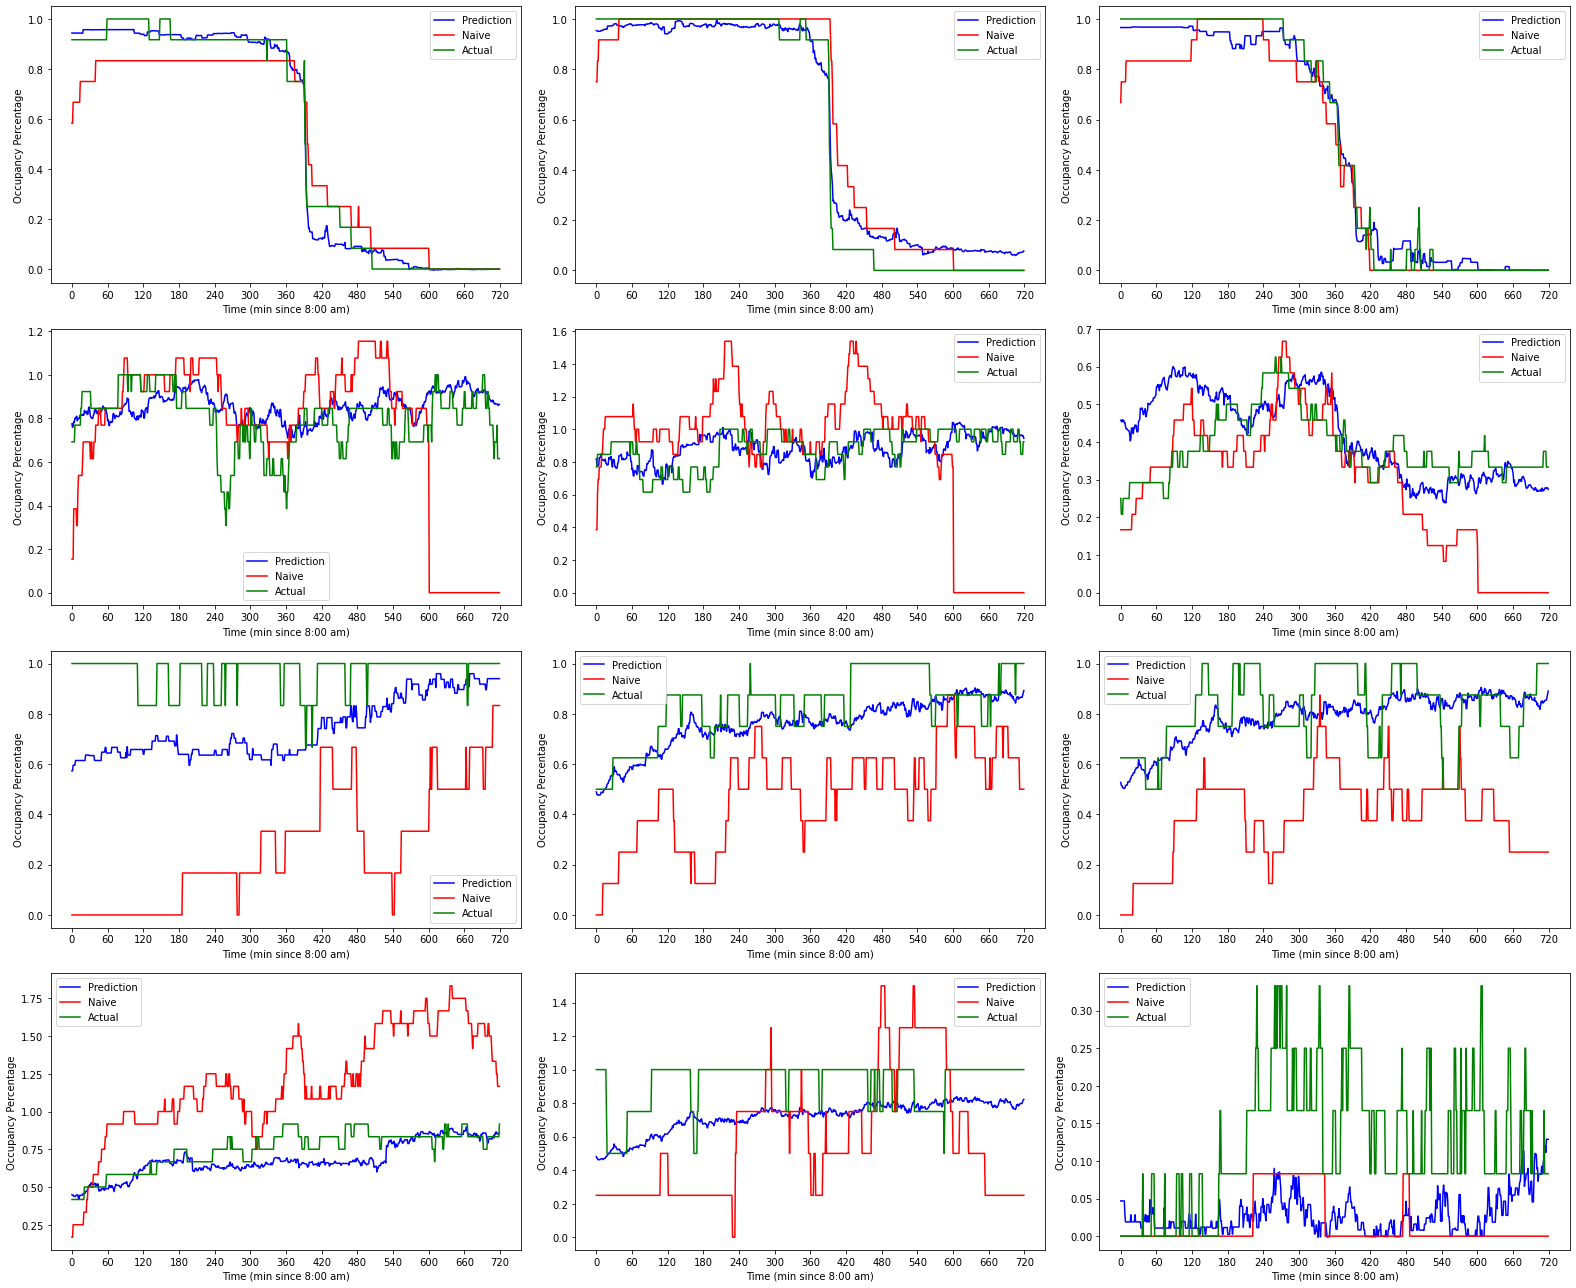

Prediction Error: 
0.10484572960010473
Naive Error: 
0.2890621527777778


In [140]:
plt.figure(figsize=(22,18))
time = np.arange(720)
error = 0
naive_error = 0
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.plot(time, prediction[i], color='b', label="Prediction")
    plt.plot(time, xb1_test[i], color='r', label="Naive")
    plt.plot(time, yb_test[i], color='g', label="Actual")
    plt.xticks(np.arange(0,780,60))
    plt.legend()
    plt.xlabel('Time (min since 8:00 am)')
    plt.ylabel('Occupancy Percentage')
    error += np.mean(np.abs(yb_test[i]-prediction[i]))
    naive_error += np.mean(np.abs(yb_test[i]-xb1_test[i]))

plt.tight_layout()
plt.show()
print("Prediction Error: ")
print(error/12)
print("Naive Error: ")
print(naive_error/12)

In [69]:
print("Regular Ridge Regression Error:")
print(reg_error)
print(np.mean(reg_error))

Regular Ridge Regression Error:
[0.033064603833857384, 0.1048442677419348, 0.23105098347203404, 0.0910672104909418, 0.1787114724688115, 0.09611441614467668]
0.12247549235870936


## Un-correlated Prediction

In [141]:
def upredict_occ(x_test, rrg, rgc):
    prediction = np.zeros((x_test.shape))
    x = x_test.reshape(1,-1)
    scale = []

    for i in range(6):
        scale.append(logistic.cdf(rgc[i].predict(x))[0])

    largest = np.argmax(scale)
    smallest = np.argmin(scale)
    
    prediction += 0.8 * rrg[largest].predict(x)[0]
    prediction += 0.2 * rrg[smallest].predict(x)[0]
    
    print(scale)
    return prediction

In [142]:
uprediction = []
for i in range(s):
    uprediction.append(upredict_occ(xb1_test[i], rrg, rgc))

[0.6963950334644564, 0.30558340458242156, 0.2693624977119931, 0.26809279789194657, 0.26702385947514334, 0.263951964492412]
[0.7785988244485962, 0.21747763492433594, 0.2713847950077368, 0.2725471158029601, 0.2735469850059441, 0.27309416294473915]
[0.7071980542981097, 0.2942948875866027, 0.27275703619857383, 0.27825836584541647, 0.2725670026324735, 0.27250125756347104]
[0.25221687274865073, 0.744172162026837, 0.26979195843651727, 0.2804473197508563, 0.25655725588496514, 0.2740922754834248]
[0.29858242165863835, 0.6917206074014691, 0.30231164253212284, 0.32978225138325523, 0.29811524335003947, 0.3042733417161324]
[0.30118017322604534, 0.6128661441605324, 0.2584239743654955, 0.29758180153449354, 0.2758547883972996, 0.345420774701432]
[0.2570335028818222, 0.28352277835016215, 0.5598486399882269, 0.49107140835044866, 0.27721400305611965, 0.2547025526082231]
[0.216413185295594, 0.3008365618432033, 0.25991505244140034, 0.7185064828198355, 0.2749364715382499, 0.26262777582246166]
[0.24038551744

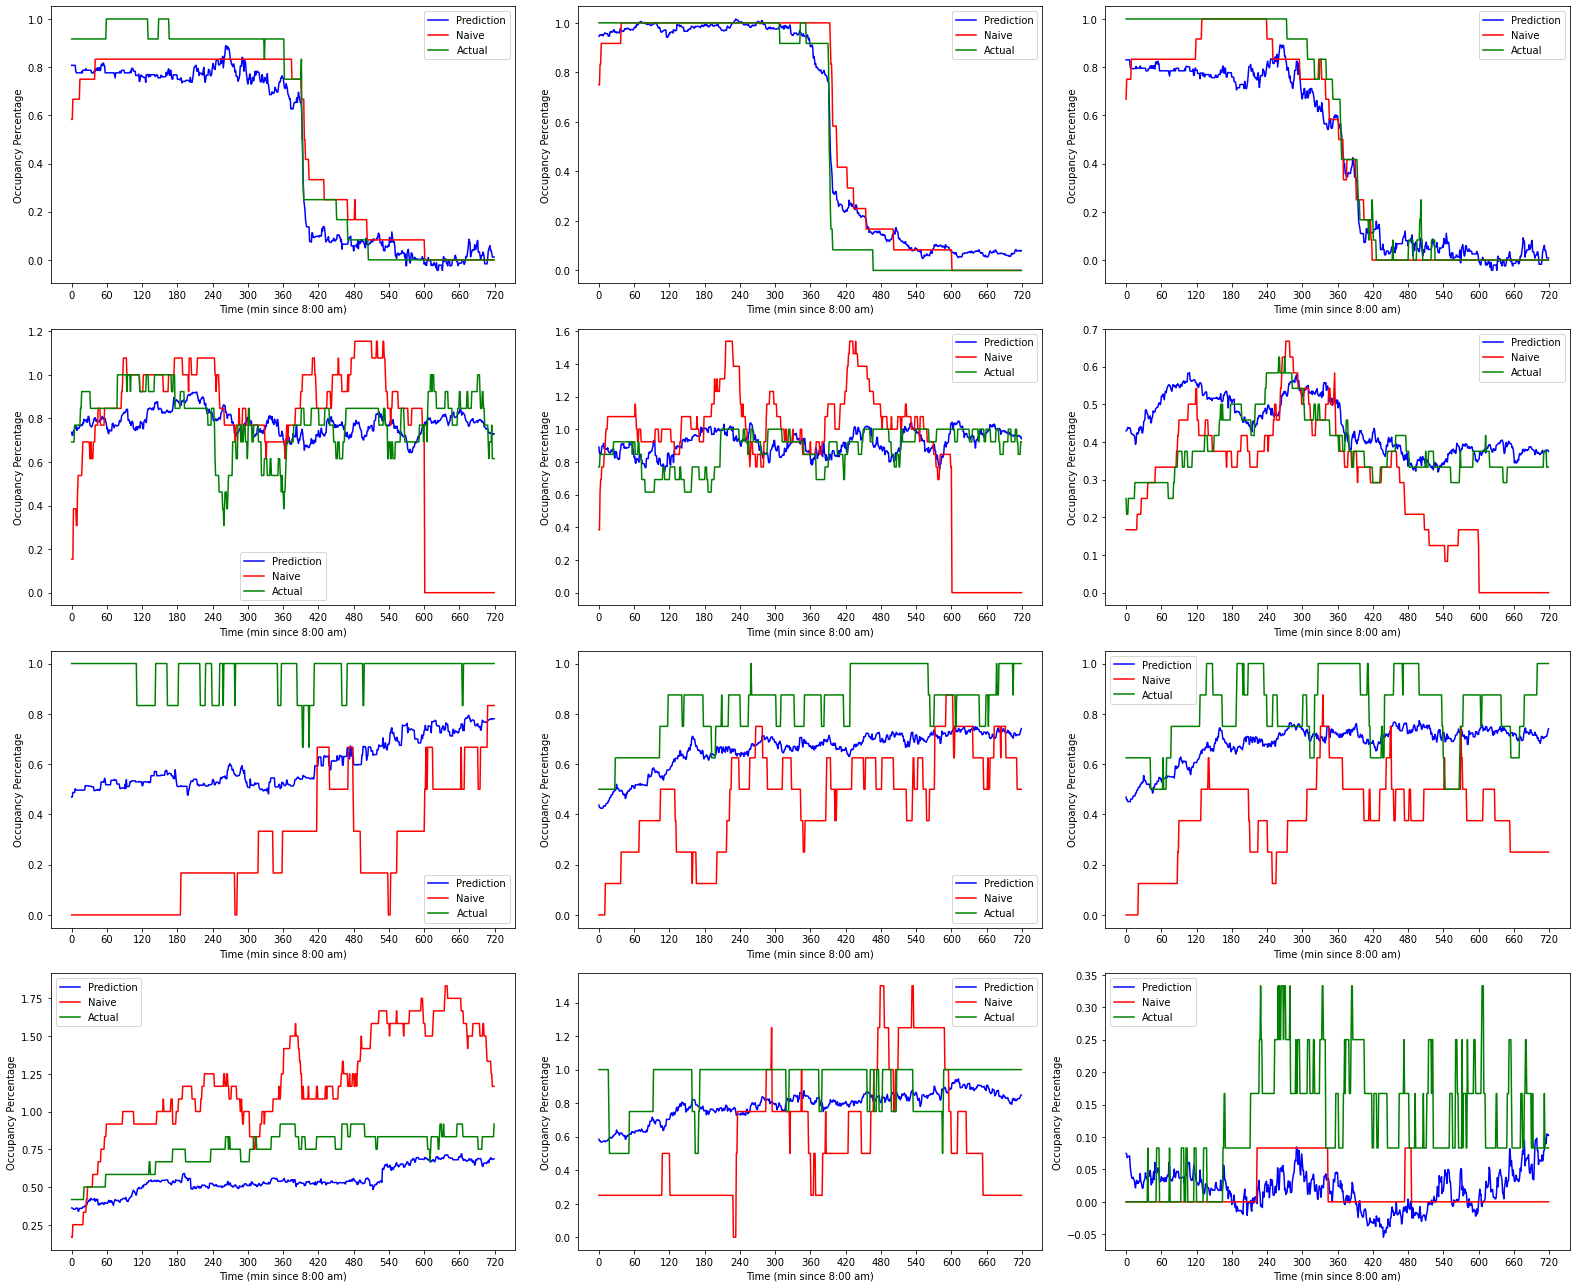

Prediction Error: 
0.14695737114709465
Naive Error: 
0.2890621527777778


In [143]:
plt.figure(figsize=(22,18))
time = np.arange(720)
error = 0
naive_error = 0
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.plot(time, uprediction[i], color='b', label="Prediction")
    plt.plot(time, xb1_test[i], color='r', label="Naive")
    plt.plot(time, yb_test[i], color='g', label="Actual")
    plt.xticks(np.arange(0,780,60))
    plt.legend()
    plt.xlabel('Time (min since 8:00 am)')
    plt.ylabel('Occupancy Percentage')
    error += np.mean(np.abs(yb_test[i]-uprediction[i]))
    naive_error += np.mean(np.abs(yb_test[i]-xb1_test[i]))

plt.tight_layout()
plt.show()
print("Prediction Error: ")
print(error/12)
print("Naive Error: ")
print(naive_error/12)